# PA 2: Classification - Nearest Neighbors

## Student Details (1 Point)

First Student Name and ID: SANJANA KONDABATHINI (1001984312)

Second Student Name and ID: MEGHANA KADALI (1002027499)

Third Student Name and ID: MUCHARLA RAJASHEKAR (1002027966)



Notes: When submitting, fill your name and ID in this cell.  [1 point]

Make sure to write about any 4-5 line to explain any kind of visualization

Do not to forget to cite any external sources used by you.

## Programming Assignment Details (25 Points)

For this assignment use Jupyter notebook, Panda, and scikit.
* Load dataset_NN.csv dataset. [1 points]
* Pre-processing. [3 points]
* Select best 3 attributes for training and testing your model. [2 points]
* Find the best K using elbow method. [3 points]
* Split your dataset 75% for training, and 25% for testing the classifier. [2 points]
* Use Euclidean distance.[3 points]
* Test the classifier with three diferent numbers for neighbors and record the results.[3 points]
* Use comments to explain your code and variable names.[2 points]
* Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers. **Plot the Error rate vs. K-value**.[6 points]

## Extra points will be given for adequately explained preprocessing and high accuracy above 80%(up to 10 points)

## Report (22 Points)

For each classification task you need to submit a report (PDF) that you have to:
* Include a paragraph describing the contribution made by each team member
* Describe the Nearest Neighbors method. [5 points]
* Explain what was your criteria for selecting the three attributes. What other 3 attribute can you choose? [7 points]
* Visualizations of the target variable w.r.t three most significant attributes in a 2D projection, and write your observations in 4 - 5 lines. [5 points]
* Interpret and compare the results.[5 points]

Do not to forget to cite your sources!

In [1]:
#Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score,accuracy_score

In [2]:
#Read Data set
df=pd.read_csv('dataset_NN.csv')

In [3]:
#First 5 Records
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Last 5 Records
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#Details of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [6]:
#Detailed description of dataset using describe()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
#Drop the following attributes from the table as there is no logical reason behind the following attributes:
##  1) Name
##  2) Ticket
##  3) Cabin

In [8]:
df = df.drop('Name', axis=1,)
df = df.drop('Ticket', axis=1,)
df = df.drop('Cabin', axis=1,)

In [9]:
#Join SibSp, Parch
df['Family_Count'] = df['SibSp'] + df['Parch'] + 1
df = df.drop('SibSp', axis=1,)
df = df.drop('Parch', axis=1,)

In [10]:
#Checking Null values
df.isnull().sum()

Survived          0
Pclass            0
Sex               0
Age             177
Fare              0
Embarked          2
Family_Count      0
dtype: int64

In [11]:
#Handling Null Values
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"].mode()

0    S
dtype: object

In [12]:
df["Embarked"] = df["Embarked"].fillna("S")

In [13]:
#Size of the Data set
df.shape[0]

891

In [14]:
#Checking if there are no null values
df.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age             0
Fare            0
Embarked        0
Family_Count    0
dtype: int64

In [15]:
df['Embarked']=df['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})
df['Sex']=df['Sex'].map({'male' : 0, 'female' : 1})

In [16]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_Count
0,0,3,0,22.0,7.2500,0,2
1,1,1,1,38.0,71.2833,1,2
2,1,3,1,26.0,7.9250,0,1
3,1,1,1,35.0,53.1000,0,2
4,0,3,0,35.0,8.0500,0,1


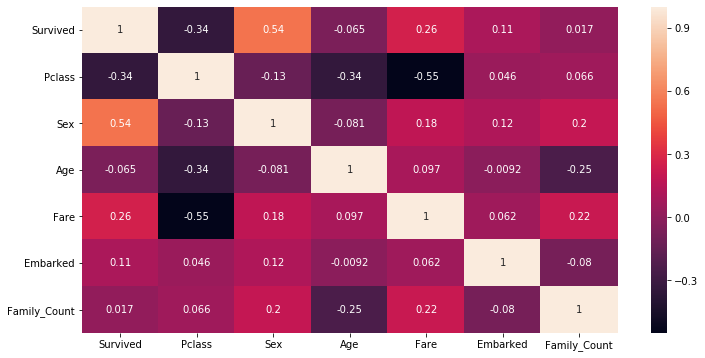

In [17]:
#Finding correleation between the varabiles
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True)

In [18]:
#Top 3 attributes 
print('Important features:')
corr=df.corr()
corr.sort_values(['Embarked'],ascending=False,inplace=True)
corr.Embarked

Important features:


Embarked        1.000000
Sex             0.116569
Survived        0.106811
Fare            0.062142
Pclass          0.045702
Age            -0.009165
Family_Count   -0.080281
Name: Embarked, dtype: float64

In [19]:
#Top 3 attributes for training and testing are Sex, Survived, Fare for Embarked

In [20]:
#Splilting the data into 75% for training,25% for testing the classifier
y=df['Embarked'].values
x=df.loc[:,['Sex','Survived','Fare']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [21]:
print(x_train.shape), print(y_train.shape)
print(x_test.shape), print(y_test.shape)

(668, 3)
(668,)
(223, 3)
(223,)


(None, None)

In [22]:
#Elbow method
#we consider k with least error rate
error_rate = []
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(pred != y_test))

Min error -  0.19282511210762332 at K =  2


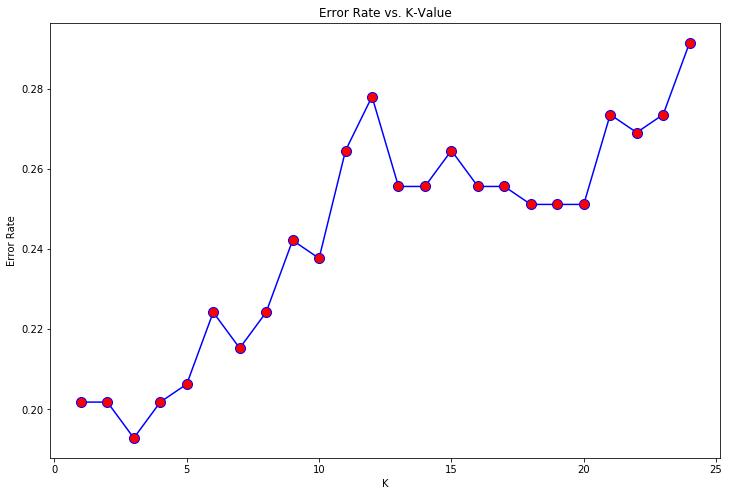

In [23]:
plt.figure(figsize=(12,8))
plt.plot(range(1,25), error_rate, color = 'blue', marker = 'o', markersize=10, markerfacecolor = 'red')
plt.title('Error Rate vs. K-Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Min error - ", min(error_rate), "at K = ", error_rate.index(min(error_rate)))

Max Accuracy -  0.8071748878923767 at K =  2


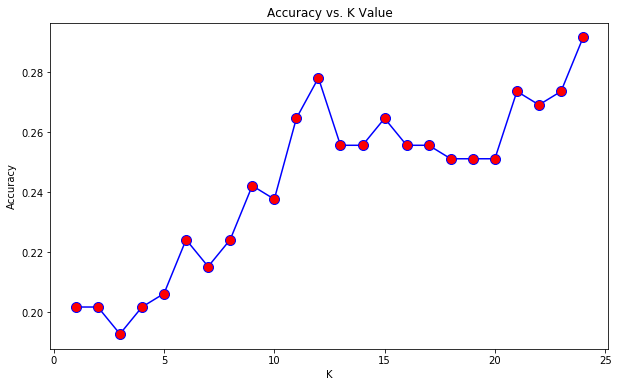

In [24]:
s = []
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    yY = knn.predict(x_test)
    s.append(metrics.accuracy_score(y_test,yY))
plt.figure(figsize=(10,6))
plt.plot(range(1,25), error_rate, color = 'blue', marker = 'o', markersize = 10, markerfacecolor = 'red')
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Max Accuracy - ", max(s), "at K = ", s.index(max(s)))

In [25]:
#At K = 2 we are getting least error score and maxmimum accuracy.
#There are several ways to get the value of k by computing sqrt(N), where n stands for the number of samples in the training dataset.

In [26]:
#let k=3 with minkowski distance
knn = KNeighborsClassifier(n_neighbors = 3,metric = 'minkowski',p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [27]:
train_accuracy = knn.score(x_train, y_train)
print(train_accuracy)

0.8892215568862275


In [28]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[146,   5,   3],
       [ 29,  21,   2],
       [  4,   0,  13]], dtype=int64)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       154
           1       0.81      0.40      0.54        52
           2       0.72      0.76      0.74        17

    accuracy                           0.81       223
   macro avg       0.78      0.71      0.72       223
weighted avg       0.81      0.81      0.79       223



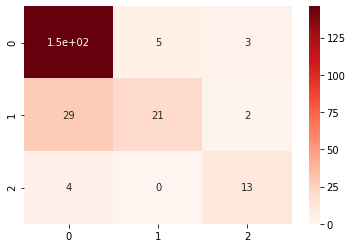

In [29]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
sns.heatmap(conf_matrix,annot=True,cmap='Reds')

accuracy_score :  0.7937219730941704
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       154
           1       0.77      0.44      0.56        52
           2       0.67      0.59      0.62        17

    accuracy                           0.79       223
   macro avg       0.75      0.66      0.68       223
weighted avg       0.79      0.79      0.78       223



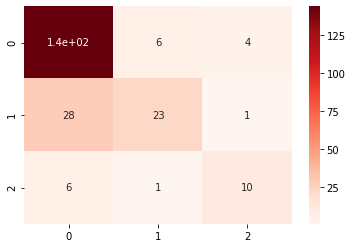

In [30]:
#let k=5 with minkowski distance

knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
conf_matrix = confusion_matrix(y_test,y_pred)
print("accuracy_score : ",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(conf_matrix,annot=True,cmap='Reds')

accuracy_score :  0.757847533632287
              precision    recall  f1-score   support

           0       0.75      0.97      0.85       154
           1       0.85      0.21      0.34        52
           2       0.75      0.53      0.62        17

    accuracy                           0.76       223
   macro avg       0.78      0.57      0.60       223
weighted avg       0.77      0.76      0.71       223



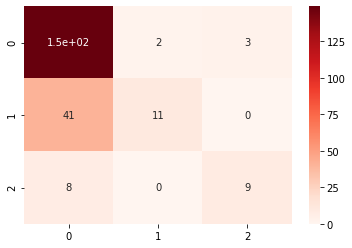

In [31]:
#let k=9 with minkowski distance

knn = KNeighborsClassifier(n_neighbors=9,metric='minkowski',p=2)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
conf_matrix=confusion_matrix(y_test,y_pred)
print("accuracy_score : ",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(conf_matrix,annot=True,cmap='Reds')

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       154
           1       0.76      0.37      0.49        52
           2       0.86      0.71      0.77        17

    accuracy                           0.80       223
   macro avg       0.81      0.68      0.71       223
weighted avg       0.79      0.80      0.77       223



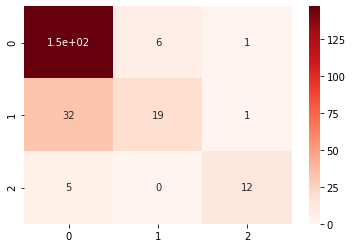

In [32]:
#let k=2

knn = KNeighborsClassifier(n_neighbors=2,metric='euclidean')
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
conf_matrix=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
sns.heatmap(conf_matrix,annot=True,cmap='Reds')

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       154
           1       0.77      0.44      0.56        52
           2       0.67      0.59      0.62        17

    accuracy                           0.79       223
   macro avg       0.75      0.66      0.68       223
weighted avg       0.79      0.79      0.78       223



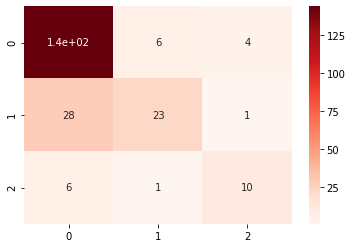

In [33]:
#let k=5 euclidean

knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
conf_matrix=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
sns.heatmap(conf_matrix,annot=True,cmap='Reds')

              precision    recall  f1-score   support

           0       0.75      0.97      0.85       154
           1       0.85      0.21      0.34        52
           2       0.75      0.53      0.62        17

    accuracy                           0.76       223
   macro avg       0.78      0.57      0.60       223
weighted avg       0.77      0.76      0.71       223



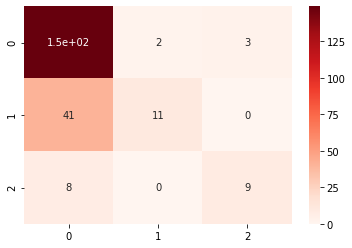

In [34]:
#let k=9 euclidean

knn = KNeighborsClassifier(n_neighbors=9,metric='euclidean')
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
conf_matrix=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
sns.heatmap(conf_matrix,annot=True,cmap='Reds')

Text(0, 0.5, 'Error Rate')

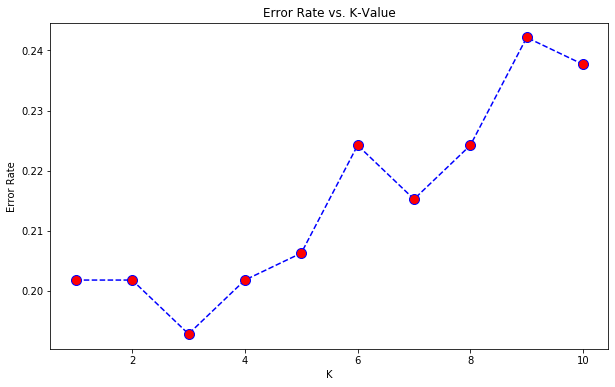

In [35]:
# Error rate vs K-value graph
error_rate = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(pred!=y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', marker='o', linestyle='dashed', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Accuracy')

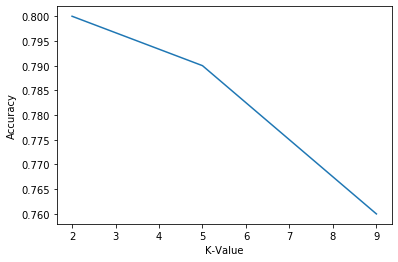

In [36]:
#Accuracy vs K-values plot 
x = (2,5,9) 
y = [0.80, 0.79, 0.76]
plt.plot(x, y)
plt.xlabel('K-Value')  
plt.ylabel('Accuracy')

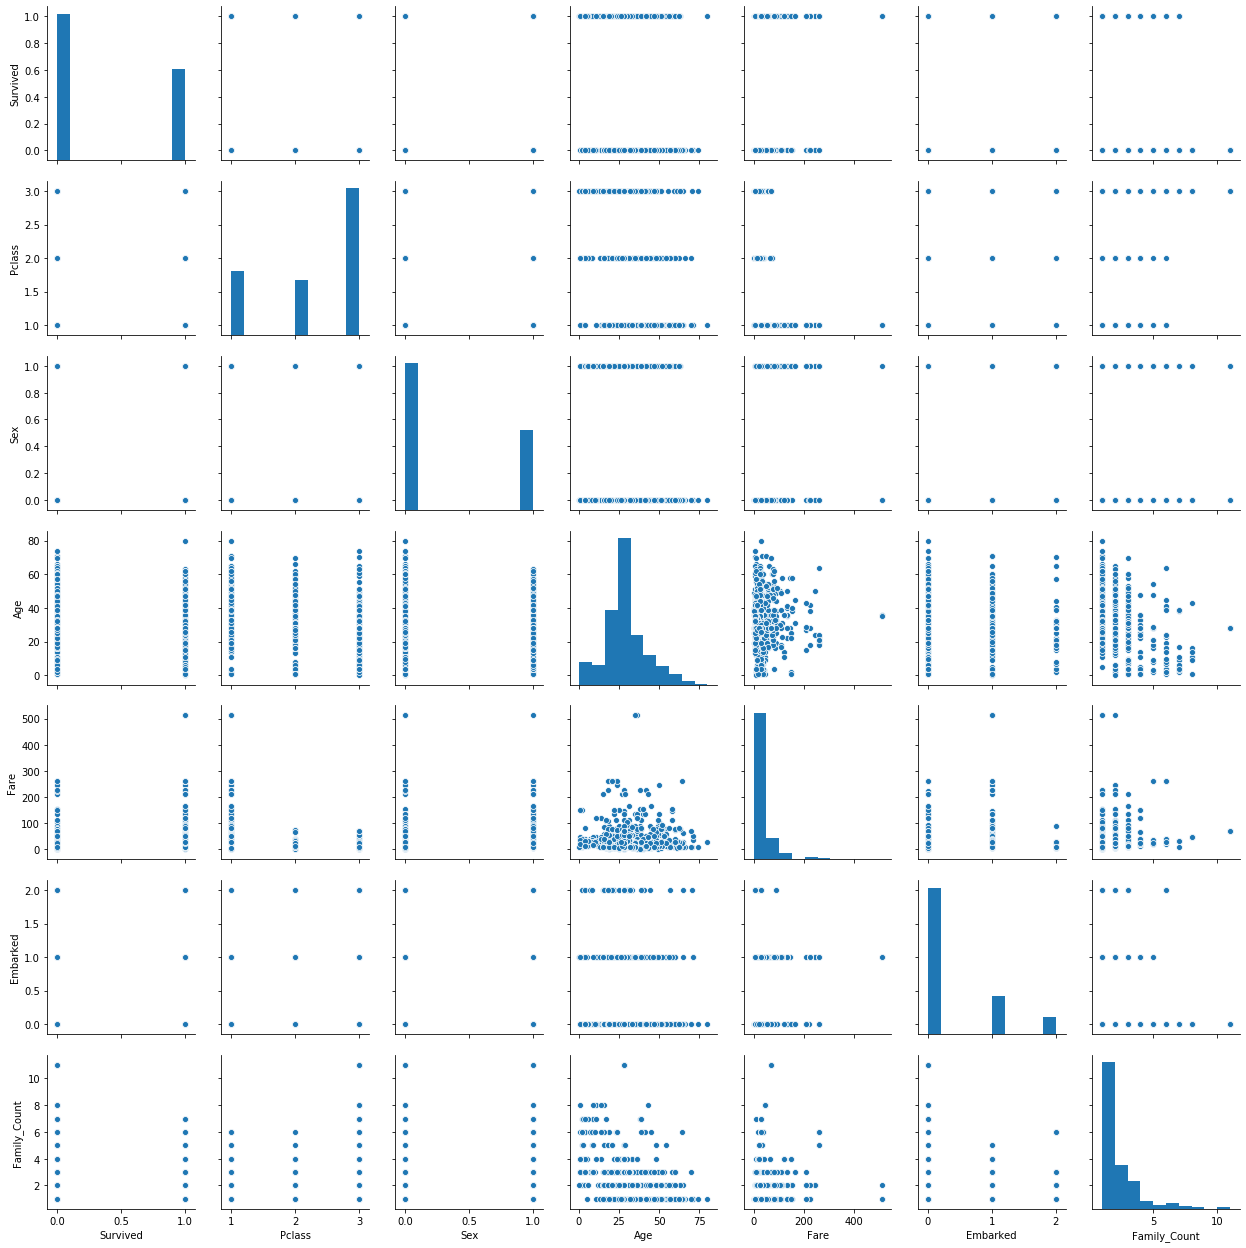

In [37]:
#Pairplot
sns.pairplot(df)

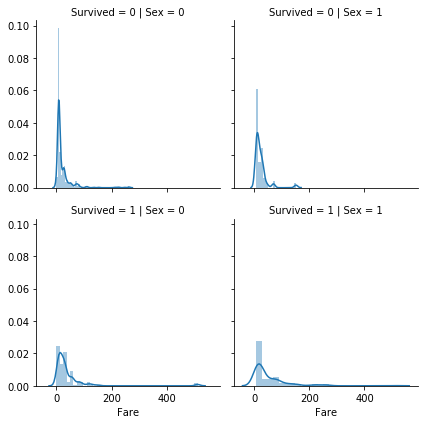

In [40]:
#Facegrid of Sex, Survived and Fare
sns.FacetGrid(df, col = 'Sex', row = 'Survived').map(sns.distplot, 'Fare')

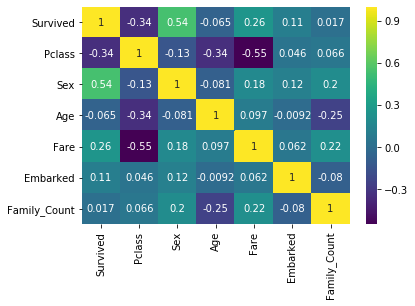

In [39]:
#Heatmap
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

## Programming Assignment Submission Instructions (2 Points)

### Each file should be submitted separately, do not compress them

For Decision Tree and Naive Bayes:
1.	'yourLastName_Last4digitsofyourID_DT.ipynb' (Report in markdown cells and code in code cells of Notebook preferred)
2.	Report in PDF (optional)

For Nearest Neighbor:
1.	'yourLastName_Last4digitsofyourID_NN.ipynb' (Report in markdown cells and code in code cells of Notebook preferred)
2.	Report in PDF (optional)

### <b>Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn<b>